# ARUCO markers: basics

## 1:  Marker creation

In [1]:
import numpy as np
import cv2, PIL
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

<IPython.core.display.Javascript object>


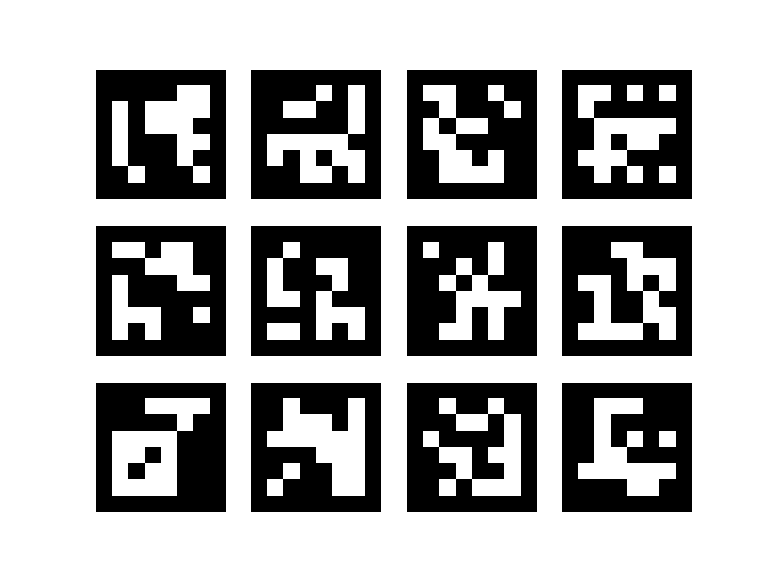

In [2]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 4
ny = 3
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("markers.jpg")    
plt.show()

## 2: Print, cut, stick and take a picture

<IPython.core.display.Javascript object>


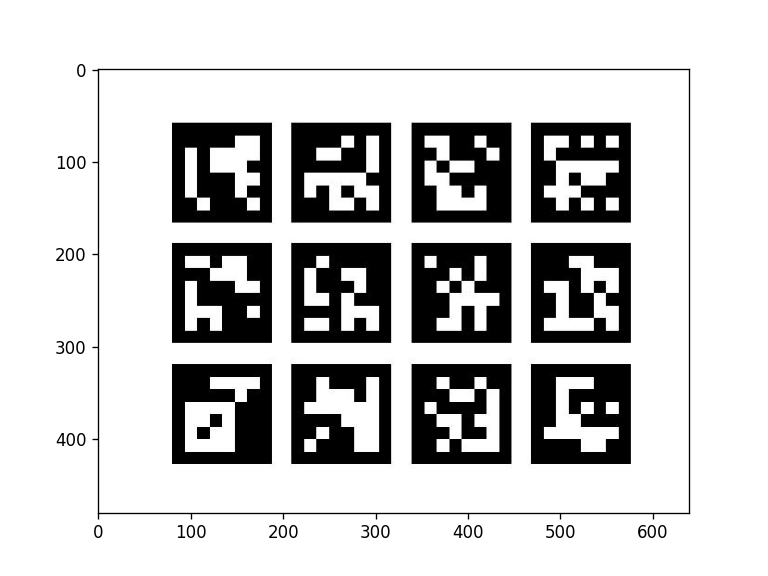

In [4]:
frame = cv2.imread("markers.jpg")
plt.figure()
plt.imshow(frame)
plt.show()

## 3: Post processing

In [5]:
%%time
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)


CPU times: user 131 ms, sys: 67.7 ms, total: 198 ms
Wall time: 23.3 ms


Pretty fast processing !

## 4: Results

<IPython.core.display.Javascript object>


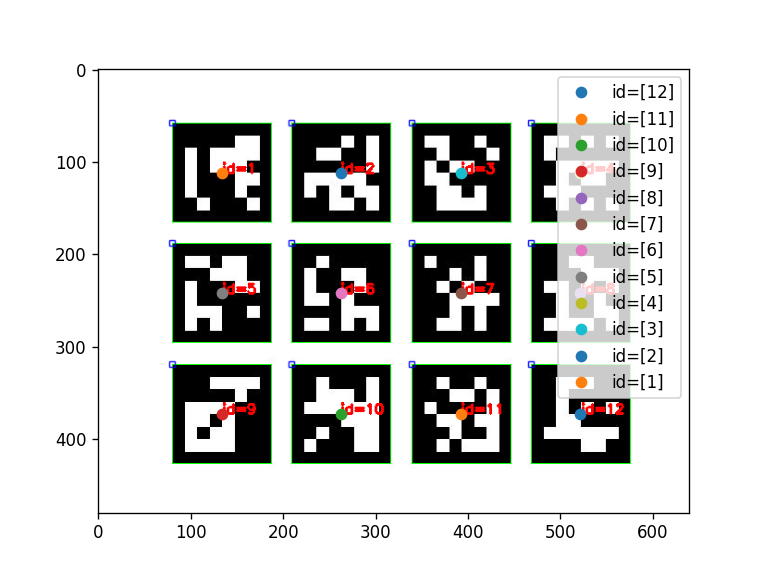

In [6]:
plt.figure()
plt.imshow(frame_markers)
for i in range(len(ids)):
    c = corners[i][0]
    plt.plot([c[:, 0].mean()], [c[:, 1].mean()], "o", label = "id={0}".format(ids[i]))
plt.legend()
plt.show()

In [10]:
def quad_area(data):
    l = data.shape[0]//2
    corners = data[["c1", "c2", "c3", "c4"]].values.reshape(l, 2,4)
    c1 = corners[:, :, 0]
    c2 = corners[:, :, 1]
    c3 = corners[:, :, 2]
    c4 = corners[:, :, 3]
    e1 = c2-c1
    e2 = c3-c2
    e3 = c4-c3
    e4 = c1-c4
    a = -.5 * (np.cross(-e1, e2, axis = 1) + np.cross(-e3, e4, axis = 1))
    return a

corners2 = np.array([c[0] for c in corners])

data = pd.DataFrame({"x": corners2[:,:,0].flatten(), "y": corners2[:,:,1].flatten()},
                   index = pd.MultiIndex.from_product( 
                           [ids.flatten(), ["c{0}".format(i )for i in np.arange(4)+1]], 
                       names = ["marker", ""] ))

data = data.unstack().swaplevel(0, 1, axis = 1).stack()
data["m1"] = data[["c1", "c2"]].mean(axis = 1)
data["m2"] = data[["c2", "c3"]].mean(axis = 1)
data["m3"] = data[["c3", "c4"]].mean(axis = 1)
data["m4"] = data[["c4", "c1"]].mean(axis = 1)
data["o"] = data[["m1", "m2", "m3", "m4"]].mean(axis = 1)
data

c1     c2     c3     c4     m1     m2     m3     m4      o
marker                                                                 
1      x   80.0  187.0  187.0   80.0  133.5  187.0  133.5   80.0  133.5
       y   58.0   58.0  165.0  165.0   58.0  111.5  165.0  111.5  111.5
2      x  209.0  316.0  316.0  209.0  262.5  316.0  262.5  209.0  262.5
       y   58.0   58.0  165.0  165.0   58.0  111.5  165.0  111.5  111.5
3      x  339.0  446.0  446.0  339.0  392.5  446.0  392.5  339.0  392.5
       y   58.0   58.0  165.0  165.0   58.0  111.5  165.0  111.5  111.5
4      x  468.0  575.0  575.0  468.0  521.5  575.0  521.5  468.0  521.5
       y   58.0   58.0  165.0  165.0   58.0  111.5  165.0  111.5  111.5
5      x   80.0  187.0  187.0   80.0  133.5  187.0  133.5   80.0  133.5
       y  188.0  188.0  295.0  295.0  188.0  241.5  295.0  241.5  241.5
6      x  209.0  316.0  316.0  209.0  262.5  316.0  262.5  209.0  262.5
       y  188.0  188.0  295.0  295.0  188.0  241.5  295.0  241.5  241.5
7      x  339.0  446.0  446.0  339.0  392.5  446.0  392.5  339.0  392.5
       y  188.0  188.0  295.0  295.0  188.0  241.5  295.0  241.5  241.5
8      x  468.0  575.0  575.0  468.0  521.5  575.0  521.5  468.0  521.5
       y  188.0  188.0  295.0  295.0  188.0  241.5  295.0  241.5  241.5
9      x   80.0  187.0  187.0   80.0  133.5  187.0  133.5   80.0  133.5
       y  319.0  319.0  426.0  426.0  319.0  372.5  426.0  372.5  372.5
10     x  209.0  316.0  316.0  209.0  262.5  316.0  262.5  209.0  262.5
       y  319.0  319.0  426.0  426.0  319.0  372.5  426.0  372.5  372.5
11     x  339.0  446.0  446.0  339.0  392.5  446.0  392.5  339.0  392.5
       y  319.0  319.0  426.0  426.0  319.0  372.5  426.0  372.5  372.5
12     x  468.0  575.0  575.0  468.0  521.5  575.0  521.5  468.0  521.5
       y  319.0  319.0  426.0  426.0  319.0  372.5  426.0  372.5  372.5